<a href="https://colab.research.google.com/github/Onedory/UROP_colorize_method/blob/main/4.%20%EC%83%89%EC%B9%A0%EB%AA%A8%EB%8D%B8_%EC%B5%9C%EC%A0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...........................n_clusters=10, n_init=13; total time= 1.6min
[CV] END ...........................n_clusters=10, n_init=13; total time= 1.9min
[CV] END ...........................n_clusters=10, n_init=13; total time= 1.4min
[CV] END ............................n_clusters=2, n_init=16; total time=  23.6s
[CV] END ............................n_clusters=2, n_init=16; total time=  20.9s
[CV] END ............................n_clusters=2, n_init=16; total time=  18.3s
[CV] END ...........................n_clusters=10, n_init=15; total time= 2.0min
[CV] END ...........................n_clusters=10, n_init=15; total time= 1.8min
[CV] END ...........................n_clusters=10, n_init=15; total time= 1.6min
[CV] END .............................n_clusters=8, n_init=9; total time=  51.5s
[CV] END .............................n_clusters=8, n_init=9; total time=  58.0s
[CV] END .............

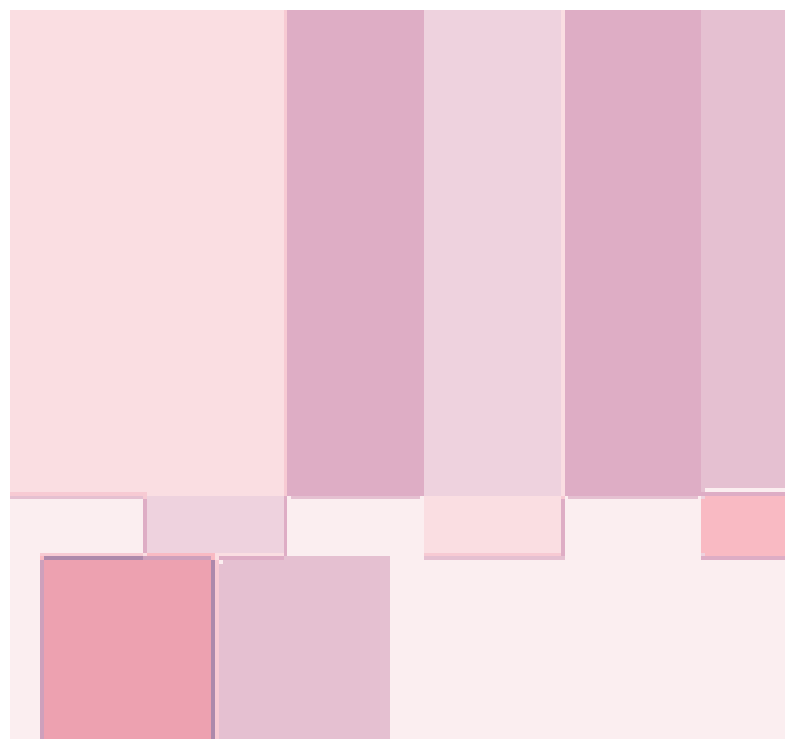

Colorized image saved to /content/drive/MyDrive/UROP/colorized_image_random_search.png


In [ ]:
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import silhouette_score

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 이미지 경로 설정
gray_image_path = '/content/drive/MyDrive/UROP/gray.png'
reference_image_path = '/content/drive/MyDrive/UROP/pink.png'

# 이미지 로드
gray_image = cv2.imread(gray_image_path, cv2.IMREAD_GRAYSCALE)
reference_image = cv2.imread(reference_image_path)

# 이미지가 정상적으로 로드되었는지 확인
if gray_image is None:
    print(f"Error loading image from {gray_image_path}. Check the file path and ensure the image exists.")
if reference_image is None:
    print(f"Error loading image from {reference_image_path}. Check the file path and ensure the image exists.")

# 이미지에서 주요 색상을 추출하는 함수
def extract_dominant_colors(image, k=5, n_init=10):
    pixels = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, n_init=n_init)
    kmeans.fit(pixels)
    colors = kmeans.cluster_centers_
    return colors

# 하이퍼파라미터 범위 설정
param_dist = {
    'n_clusters': list(range(2, 11)),
    'n_init': list(range(5, 21))
}

# 랜덤 서치 실행
kmeans = KMeans()
random_search = RandomizedSearchCV(kmeans, param_distributions=param_dist, n_iter=10, cv=3, verbose=2)
random_search.fit(reference_image.reshape(-1, 3))
print("Best parameters found by Random Search:", random_search.best_params_)

# 최적의 파라미터로 참조 이미지에서 주요 색상 추출
best_k = random_search.best_params_['n_clusters']
best_n_init = random_search.best_params_['n_init']

dominant_colors = extract_dominant_colors(reference_image, k=best_k, n_init=best_n_init)

# 그레이스케일 이미지를 색칠하는 함수
def colorize_image(gray_image, colors):
    h, w = gray_image.shape
    colorized_image = np.zeros((h, w, 3), dtype=np.uint8)

    # 각 픽셀에 대해 가장 가까운 색상을 찾음
    for i in range(h):
        for j in range(w):
            pixel_value = gray_image[i, j]
            color_index = int(pixel_value * (len(colors) - 1) / 255)
            colorized_image[i, j] = colors[color_index]

    return colorized_image

# 그레이스케일 이미지를 색칠
if gray_image is not None and reference_image is not None:
    colorized_image = colorize_image(gray_image, dominant_colors)

    # matplotlib으로 표시하기 위해 BGR을 RGB로 변환
    colorized_image_rgb = cv2.cvtColor(colorized_image, cv2.COLOR_BGR2RGB)

    # 색칠된 이미지 표시
    plt.figure(figsize=(10, 10))
    plt.imshow(colorized_image_rgb)
    plt.axis('off')
    plt.show()

    # 색칠된 이미지 저장
    colorized_image_path = '/content/drive/MyDrive/UROP/colorized_image_random_search.png'
    cv2.imwrite(colorized_image_path, colorized_image)
    print(f"Colorized image saved to {colorized_image_path}")


최적화된 파라미터로 색칠 모델 코드

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


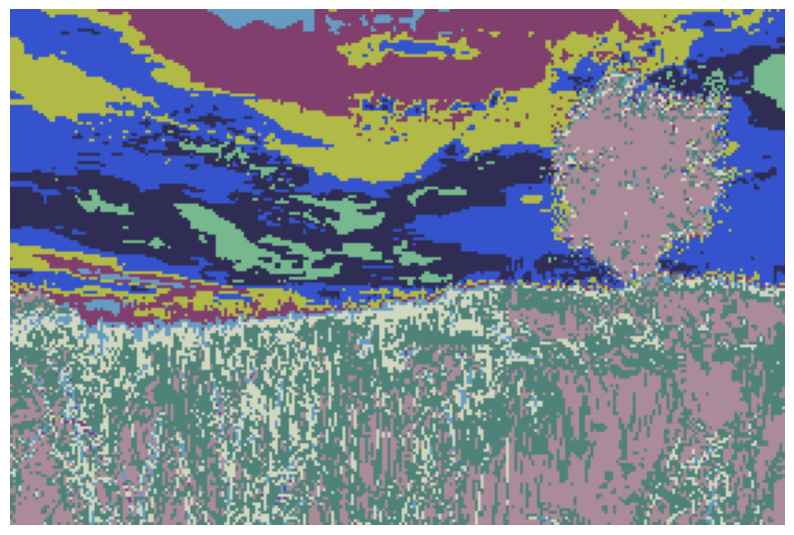

Colorized image saved to /content/drive/MyDrive/UROP/fianl_output.png


In [ ]:
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 이미지 경로 설정
gray_image_path = '/content/drive/MyDrive/UROP/gray2.jpeg'
reference_image_path = '/content/drive/MyDrive/UROP/Dataset/WikiArt/image_5.png'

# 이미지 로드
gray_image = cv2.imread(gray_image_path, cv2.IMREAD_GRAYSCALE)
reference_image = cv2.imread(reference_image_path)

# 이미지가 정상적으로 로드되었는지 확인하고, 오류 메시지 출력
if gray_image is None:
    print(f"Error loading image from {gray_image_path}. Check the file path and ensure the image exists.")
if reference_image is None:
    print(f"Error loading image from {reference_image_path}. Check the file path and ensure the image exists.")
    # Stop execution if reference image is not loaded
    exit()

# 최적의 파라미터로 주요 색상을 추출하는 함수
def extract_dominant_colors(image, k=10, n_init=13):
    pixels = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, n_init=n_init)
    kmeans.fit(pixels)
    colors = kmeans.cluster_centers_
    return colors

# 그레이스케일 이미지를 색칠하는 함수
def colorize_image(gray_image, colors):
    h, w = gray_image.shape
    colorized_image = np.zeros((h, w, 3), dtype=np.uint8)

    # 각 픽셀에 대해 가장 가까운 색상을 찾음
    for i in range(h):
        for j in range(w):
            pixel_value = gray_image[i, j]
            color_index = int(pixel_value * (len(colors) - 1) / 255)
            colorized_image[i, j] = colors[color_index]

    return colorized_image

# 참조 이미지에서 주요 색상 추출
dominant_colors = extract_dominant_colors(reference_image, k=10, n_init=13)

# 그레이스케일 이미지를 색칠
if gray_image is not None and reference_image is not None:
    colorized_image = colorize_image(gray_image, dominant_colors)

    # matplotlib으로 표시하기 위해 BGR을 RGB로 변환
    colorized_image_rgb = cv2.cvtColor(colorized_image, cv2.COLOR_BGR2RGB)

    # 색칠된 이미지 표시
    plt.figure(figsize=(10, 10))
    plt.imshow(colorized_image_rgb)
    plt.axis('off')
    plt.show()

    # 색칠된 이미지 저장
    colorized_image_path = '/content/drive/MyDrive/UROP/fianl_output.png'
    cv2.imwrite(colorized_image_path, colorized_image)
    print(f"Colorized image saved to {colorized_image_path}")

In [ ]:
from skimage.color import rgb2lab, deltaE_ciede2000
from PIL import Image
import numpy as np

# 이미지 경로 설정
colorized_image_path = '/content/drive/MyDrive/UROP/fianl_output.png'
reference_image_path = '/content/drive/MyDrive/UROP/Dataset/WikiArt/image_5.png'

# 이미지 로드 및 RGB로 변환
colorized_image = Image.open(colorized_image_path).convert('RGB')
reference_image = Image.open(reference_image_path).convert('RGB')

# 이미지 리사이즈 (사이즈가 동일해야 함)
colorized_image = colorized_image.resize(reference_image.size)

# 이미지 데이터를 numpy 배열로 변환
colorized_image_np = np.array(colorized_image)
reference_image_np = np.array(reference_image)

# RGB에서 LAB 색상 공간으로 변환
colorized_image_lab = rgb2lab(colorized_image_np)
reference_image_lab = rgb2lab(reference_image_np)

# 각 픽셀의 ΔE 계산
delta_e = deltaE_ciede2000(colorized_image_lab, reference_image_lab)

# 평균 ΔE 계산
mean_delta_e = np.mean(delta_e)

print(f"Average CIEDE2000 ΔE: {mean_delta_e}")


Average CIEDE2000 ΔE: 37.6198529499682


# **델타e를 작게하기 위ㅐ서 **

1.색상 팔레트 추출 더 정교하게 :클러스터 k수 조정
2. 색상 매칭 알고리즘 개선 : 이미지의 경계선이나 윤곽을 고려해서 색상 배치 알고리즘 사용

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


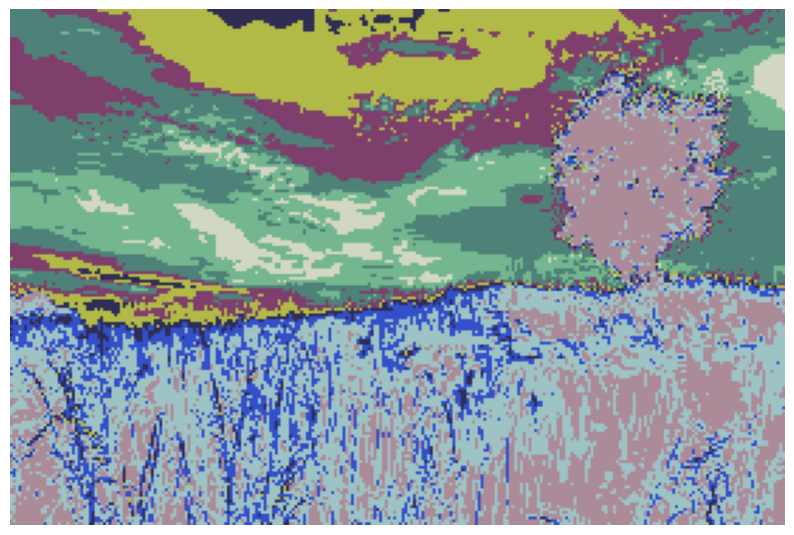

Colorized image saved to /content/drive/MyDrive/UROP/fianl_output.png


In [ ]:
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.segmentation import slic
from skimage.util import img_as_float

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 이미지 경로 설정
gray_image_path = '/content/drive/MyDrive/UROP/gray2.jpeg'
reference_image_path = '/content/drive/MyDrive/UROP/Dataset/WikiArt/image_5.png'

# 이미지 로드
gray_image = cv2.imread(gray_image_path, cv2.IMREAD_GRAYSCALE)
reference_image = cv2.imread(reference_image_path)

# 이미지가 정상적으로 로드되었는지 확인하고, 오류 메시지 출력
if gray_image is None:
    print(f"Error loading image from {gray_image_path}. Check the file path and ensure the image exists.")
if reference_image is None:
    print(f"Error loading image from {reference_image_path}. Check the file path and ensure the image exists.")
    exit()

# 최적의 파라미터로 주요 색상을 추출하는 함수
def extract_dominant_colors(image, k=10, n_init=13, segments=200):
    # Superpixel segmentation to consider structure
    image_float = img_as_float(image)
    segments_slic = slic(image_float, n_segments=segments, compactness=10, sigma=1)

    # Extract colors from each segment
    segmented_pixels = []
    for segment_value in np.unique(segments_slic):
        mask = segments_slic == segment_value
        segmented_pixels.append(image[mask])

    segmented_pixels = np.vstack(segmented_pixels)

    kmeans = KMeans(n_clusters=k, n_init=n_init)
    kmeans.fit(segmented_pixels)
    colors = kmeans.cluster_centers_

    return colors

# 그레이스케일 이미지를 색칠하는 함수
def colorize_image(gray_image, colors):
    h, w = gray_image.shape
    colorized_image = np.zeros((h, w, 3), dtype=np.uint8)

    # 각 픽셀에 대해 가장 가까운 색상을 찾음
    for i in range(h):
        for j in range(w):
            pixel_value = gray_image[i, j]
            color_index = int(pixel_value * (len(colors) - 1) / 255)
            colorized_image[i, j] = colors[color_index]

    return colorized_image

# 참조 이미지에서 최적의 파라미터로 주요 색상 추출
optimal_k = 10  # 이전에 찾았던 최적의 k 값
optimal_n_init = 13  # 이전에 찾았던 최적의 n_init 값
optimal_segments = 200  # 구조적 요소를 고려하기 위해 설정한 segments 수

dominant_colors = extract_dominant_colors(reference_image, k=optimal_k, n_init=optimal_n_init, segments=optimal_segments)

# 그레이스케일 이미지를 색칠
if gray_image is not None and reference_image is not None:
    colorized_image = colorize_image(gray_image, dominant_colors)

    # matplotlib으로 표시하기 위해 BGR을 RGB로 변환
    colorized_image_rgb = cv2.cvtColor(colorized_image, cv2.COLOR_BGR2RGB)

    # 색칠된 이미지 표시
    plt.figure(figsize=(10, 10))
    plt.imshow(colorized_image_rgb)
    plt.axis('off')
    plt.show()

    # 색칠된 이미지 저장
    colorized_image_path = '/content/drive/MyDrive/UROP/fianl_output.png'
    cv2.imwrite(colorized_image_path, colorized_image)
    print(f"Colorized image saved to {colorized_image_path}")


In [ ]:
from skimage.color import rgb2lab, deltaE_ciede2000
from PIL import Image
import numpy as np

# 이미지 경로 설정
colorized_image_path = '/content/drive/MyDrive/UROP/fianl_output.png'
reference_image_path = '/content/drive/MyDrive/UROP/Dataset/WikiArt/image_5.png'

# 이미지 로드 및 RGB로 변환
colorized_image = Image.open(colorized_image_path).convert('RGB')
reference_image = Image.open(reference_image_path).convert('RGB')

# 이미지 리사이즈 (사이즈가 동일해야 함)
colorized_image = colorized_image.resize(reference_image.size)

# 이미지 데이터를 numpy 배열로 변환
colorized_image_np = np.array(colorized_image)
reference_image_np = np.array(reference_image)

# RGB에서 LAB 색상 공간으로 변환
colorized_image_lab = rgb2lab(colorized_image_np)
reference_image_lab = rgb2lab(reference_image_np)

# 각 픽셀의 ΔE 계산
delta_e = deltaE_ciede2000(colorized_image_lab, reference_image_lab)

# 평균 ΔE 계산
mean_delta_e = np.mean(delta_e)

print(f"Average CIEDE2000 ΔE: {mean_delta_e}")


Average CIEDE2000 ΔE: 31.41768734336862


Reinhard의 Color Transfer Algorithm을 적용하여 참조 이미지의 색상 팔레트를 원본 이미지로 전달하는 방법을 구현해 보겠습니다. 이 방법은 원본 이미지의 구조를 유지하면서 참조 이미지의 색상 스타일을 반영하는 데 효과적입니다.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


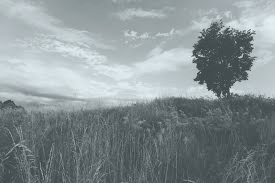

Colorized image saved to /content/drive/MyDrive/UROP/colorized_with_reinhard.png


In [ ]:
import cv2
import numpy as np
from google.colab import drive
from google.colab.patches import cv2_imshow
from skimage.color import rgb2lab, lab2rgb

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 이미지 경로 설정
gray_image_path = '/content/drive/MyDrive/UROP/gray2.jpeg'
reference_image_path = '/content/drive/MyDrive/UROP/Dataset/WikiArt/image_5.png'

# 이미지 로드
gray_image = cv2.imread(gray_image_path)
reference_image = cv2.imread(reference_image_path)

# 이미지가 정상적으로 로드되었는지 확인
if gray_image is None:
    print(f"Error loading image from {gray_image_path}. Check the file path and ensure the image exists.")
if reference_image is None:
    print(f"Error loading image from {reference_image_path}. Check the file path and ensure the image exists.")

def image_stats(image):
    """Calculate mean and standard deviation of each channel in the LAB color space."""
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    return (np.mean(l), np.std(l)), (np.mean(a), np.std(a)), (np.mean(b), np.std(b))

def apply_color_transfer(source, target):
    """Apply Reinhard's color transfer algorithm from target to source."""
    source_stats = image_stats(source)
    target_stats = image_stats(target)

    l, a, b = cv2.split(cv2.cvtColor(source, cv2.COLOR_BGR2LAB))

    # Avoid division by zero by adding a small value (epsilon) where needed
    epsilon = 1e-5

    l = (l - source_stats[0][0]) * (target_stats[0][1] / (source_stats[0][1] + epsilon)) + target_stats[0][0]
    a = (a - source_stats[1][0]) * (target_stats[1][1] / (source_stats[1][1] + epsilon)) + target_stats[1][0]
    b = (b - source_stats[2][0]) * (target_stats[2][1] / (source_stats[2][1] + epsilon)) + target_stats[2][0]

    transfer = cv2.merge([l, a, b])
    return cv2.cvtColor(transfer.astype(np.uint8), cv2.COLOR_LAB2BGR)

# 색상 전송 수행
colorized_image = apply_color_transfer(gray_image, reference_image)

# 이미지 표시 (cv2_imshow를 사용하여 Colab에서 이미지를 표시)
cv2_imshow(colorized_image)

# 이미지 저장
colorized_image_path = '/content/drive/MyDrive/UROP/colorized_with_reinhard.png'
cv2.imwrite(colorized_image_path, colorized_image)
print(f"Colorized image saved to {colorized_image_path}")


In [ ]:
from skimage.color import rgb2lab, deltaE_ciede2000
from PIL import Image
import numpy as np

# 이미지 경로 설정
colorized_image_path = '/content/drive/MyDrive/UROP/colorized_with_reinhard.png'
reference_image_path = '/content/drive/MyDrive/UROP/Dataset/WikiArt/image_5.png'

# 이미지 로드 및 RGB로 변환
colorized_image = Image.open(colorized_image_path).convert('RGB')
reference_image = Image.open(reference_image_path).convert('RGB')

# 이미지 리사이즈 (사이즈가 동일해야 함)
colorized_image = colorized_image.resize(reference_image.size)

# 이미지 데이터를 numpy 배열로 변환
colorized_image_np = np.array(colorized_image)
reference_image_np = np.array(reference_image)

# RGB에서 LAB 색상 공간으로 변환
colorized_image_lab = rgb2lab(colorized_image_np)
reference_image_lab = rgb2lab(reference_image_np)

# 각 픽셀의 ΔE 계산
delta_e = deltaE_ciede2000(colorized_image_lab, reference_image_lab)

# 평균 ΔE 계산
mean_delta_e = np.mean(delta_e)

print(f"Average CIEDE2000 ΔE: {mean_delta_e}")


Average CIEDE2000 ΔE: 24.412732929885326


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


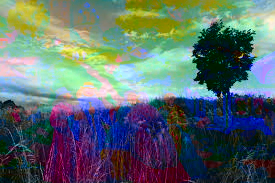

Colorized image saved to /content/drive/MyDrive/UROP/colorized_with_luminance_preserving.png


In [ ]:
import cv2
import numpy as np
from google.colab import drive
from google.colab.patches import cv2_imshow

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 이미지 경로 설정
gray_image_path = '/content/drive/MyDrive/UROP/gray2.jpeg'
reference_image_path = '/content/drive/MyDrive/UROP/Dataset/WikiArt/image_5.png'

# 이미지 로드
gray_image = cv2.imread(gray_image_path)
reference_image = cv2.imread(reference_image_path)

# 이미지가 정상적으로 로드되었는지 확인
if gray_image is None:
    print(f"Error loading image from {gray_image_path}. Check the file path and ensure the image exists.")
if reference_image is None:
    print(f"Error loading image from {reference_image_path}. Check the file path and ensure the image exists.")

# 참조 이미지를 원본 이미지의 크기로 리사이즈
reference_image_resized = cv2.resize(reference_image, (gray_image.shape[1], gray_image.shape[0]))

def luminance_preserving_color_transfer(source, target):
    """Perform luminance preserving color transfer from target to source."""
    source_lab = cv2.cvtColor(source, cv2.COLOR_BGR2LAB)
    target_lab = cv2.cvtColor(target, cv2.COLOR_BGR2LAB)

    # Extract L (luminance) and AB (color) channels
    source_l, source_a, source_b = cv2.split(source_lab)
    target_l, target_a, target_b = cv2.split(target_lab)

    # Replace the AB channels in the source with those from the target
    combined_lab = cv2.merge([source_l, target_a, target_b])

    # Convert back to BGR color space
    result = cv2.cvtColor(combined_lab, cv2.COLOR_LAB2BGR)

    return result

# 색상 전송 수행
colorized_image = luminance_preserving_color_transfer(gray_image, reference_image_resized)

# 이미지 표시 (cv2_imshow를 사용하여 Colab에서 이미지를 표시)
cv2_imshow(colorized_image)

# 이미지 저장
colorized_image_path = '/content/drive/MyDrive/UROP/colorized_with_luminance_preserving.png'
cv2.imwrite(colorized_image_path, colorized_image)
print(f"Colorized image saved to {colorized_image_path}")


In [ ]:
from skimage.color import rgb2lab, deltaE_ciede2000
from PIL import Image
import numpy as np

# 이미지 경로 설정
colorized_image_path = '/content/drive/MyDrive/UROP/colorized_with_luminance_preserving.png'
reference_image_path = '/content/drive/MyDrive/UROP/Dataset/WikiArt/image_5.png'

# 이미지 로드 및 RGB로 변환
colorized_image = Image.open(colorized_image_path).convert('RGB')
reference_image = Image.open(reference_image_path).convert('RGB')

# 이미지 리사이즈 (사이즈가 동일해야 함)
colorized_image = colorized_image.resize(reference_image.size)

# 이미지 데이터를 numpy 배열로 변환
colorized_image_np = np.array(colorized_image)
reference_image_np = np.array(reference_image)

# RGB에서 LAB 색상 공간으로 변환
colorized_image_lab = rgb2lab(colorized_image_np)
reference_image_lab = rgb2lab(reference_image_np)

# 각 픽셀의 ΔE 계산
delta_e = deltaE_ciede2000(colorized_image_lab, reference_image_lab)

# 평균 ΔE 계산
mean_delta_e = np.mean(delta_e)

print(f"Average CIEDE2000 ΔE: {mean_delta_e}")


Average CIEDE2000 ΔE: 20.575152571257018


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-28-81a098d352b4>:34: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  matched_rgb = match_histograms(source_rgb, target_rgb, multichannel=True)


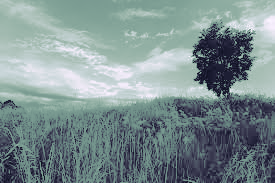

Colorized image saved to /content/drive/MyDrive/UROP/colorized_with_ahm.png


In [ ]:
import cv2
import numpy as np
from skimage.exposure import match_histograms
from google.colab import drive
from google.colab.patches import cv2_imshow

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 이미지 경로 설정
gray_image_path = '/content/drive/MyDrive/UROP/gray2.jpeg'
reference_image_path = '/content/drive/MyDrive/UROP/Dataset/WikiArt/image_5.png'

# 이미지 로드
gray_image = cv2.imread(gray_image_path)
reference_image = cv2.imread(reference_image_path)

# 이미지가 정상적으로 로드되었는지 확인
if gray_image is None:
    print(f"Error loading image from {gray_image_path}. Check the file path and ensure the image exists.")
if reference_image is None:
    print(f"Error loading image from {reference_image_path}. Check the file path and ensure the image exists.")

# 참조 이미지를 원본 이미지의 크기로 리사이즈
reference_image_resized = cv2.resize(reference_image, (gray_image.shape[1], gray_image.shape[0]))

def adaptive_histogram_matching(source, target):
    """Perform Adaptive Histogram Matching from target to source."""
    # Convert images from BGR to RGB
    source_rgb = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)
    target_rgb = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

    # Apply histogram matching
    matched_rgb = match_histograms(source_rgb, target_rgb, multichannel=True)

    # Convert back to BGR color space
    result_bgr = cv2.cvtColor(np.uint8(matched_rgb), cv2.COLOR_RGB2BGR)

    return result_bgr

# 색상 전송 수행 (AHM 적용)
colorized_image = adaptive_histogram_matching(gray_image, reference_image_resized)

# 이미지 표시 (cv2_imshow를 사용하여 Colab에서 이미지를 표시)
cv2_imshow(colorized_image)

# 이미지 저장
colorized_image_path = '/content/drive/MyDrive/UROP/colorized_with_ahm.png'
cv2.imwrite(colorized_image_path, colorized_image)
print(f"Colorized image saved to {colorized_image_path}")


In [ ]:
from skimage.color import rgb2lab, deltaE_ciede2000
from PIL import Image
import numpy as np

# 이미지 경로 설정
colorized_image_path = '/content/drive/MyDrive/UROP/colorized_with_ahm.png'
reference_image_path = '/content/drive/MyDrive/UROP/Dataset/WikiArt/image_5.png'

# 이미지 로드 및 RGB로 변환
colorized_image = Image.open(colorized_image_path).convert('RGB')
reference_image = Image.open(reference_image_path).convert('RGB')

# 이미지 리사이즈 (사이즈가 동일해야 함)
colorized_image = colorized_image.resize(reference_image.size)

# 이미지 데이터를 numpy 배열로 변환
colorized_image_np = np.array(colorized_image)
reference_image_np = np.array(reference_image)

# RGB에서 LAB 색상 공간으로 변환
colorized_image_lab = rgb2lab(colorized_image_np)
reference_image_lab = rgb2lab(reference_image_np)

# 각 픽셀의 ΔE 계산
delta_e = deltaE_ciede2000(colorized_image_lab, reference_image_lab)

# 평균 ΔE 계산
mean_delta_e = np.mean(delta_e)

print(f"Average CIEDE2000 ΔE: {mean_delta_e}")


Average CIEDE2000 ΔE: 26.0296261121454


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-26-170af9234d2e>:34: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  matched_rgb = match_histograms(source_rgb, target_rgb, multichannel=True)


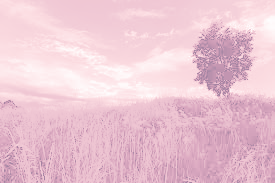

Colorized image saved to /content/drive/MyDrive/UROP/colorized_with_ahm.png


In [ ]:
import cv2
import numpy as np
from skimage.exposure import match_histograms
from google.colab import drive
from google.colab.patches import cv2_imshow

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 이미지 경로 설정
gray_image_path = '/content/drive/MyDrive/UROP/gray2.jpeg'
reference_image_path = '/content/drive/MyDrive/UROP/pink.png'

# 이미지 로드
gray_image = cv2.imread(gray_image_path)
reference_image = cv2.imread(reference_image_path)

# 이미지가 정상적으로 로드되었는지 확인
if gray_image is None:
    print(f"Error loading image from {gray_image_path}. Check the file path and ensure the image exists.")
if reference_image is None:
    print(f"Error loading image from {reference_image_path}. Check the file path and ensure the image exists.")

# 참조 이미지를 원본 이미지의 크기로 리사이즈
reference_image_resized = cv2.resize(reference_image, (gray_image.shape[1], gray_image.shape[0]))

def adaptive_histogram_matching(source, target):
    """Perform Adaptive Histogram Matching from target to source."""
    # Convert images from BGR to RGB
    source_rgb = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)
    target_rgb = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

    # Apply histogram matching
    matched_rgb = match_histograms(source_rgb, target_rgb, multichannel=True)

    # Convert back to BGR color space
    result_bgr = cv2.cvtColor(np.uint8(matched_rgb), cv2.COLOR_RGB2BGR)

    return result_bgr

# 색상 전송 수행 (AHM 적용)
colorized_image = adaptive_histogram_matching(gray_image, reference_image_resized)

# 이미지 표시 (cv2_imshow를 사용하여 Colab에서 이미지를 표시)
cv2_imshow(colorized_image)

# 이미지 저장
colorized_image_path = '/content/drive/MyDrive/UROP/colorized_with_ahm.png'
cv2.imwrite(colorized_image_path, colorized_image)
print(f"Colorized image saved to {colorized_image_path}")


In [ ]:
from skimage.color import rgb2lab, deltaE_ciede2000
from PIL import Image
import numpy as np

# 이미지 경로 설정
colorized_image_path = '/content/drive/MyDrive/UROP/colorized_with_ahm.png'
reference_image_path = '/content/drive/MyDrive/UROP/pink.png'

# 이미지 로드 및 RGB로 변환
colorized_image = Image.open(colorized_image_path).convert('RGB')
reference_image = Image.open(reference_image_path).convert('RGB')

# 이미지 리사이즈 (사이즈가 동일해야 함)
colorized_image = colorized_image.resize(reference_image.size)

# 이미지 데이터를 numpy 배열로 변환
colorized_image_np = np.array(colorized_image)
reference_image_np = np.array(reference_image)

# RGB에서 LAB 색상 공간으로 변환
colorized_image_lab = rgb2lab(colorized_image_np)
reference_image_lab = rgb2lab(reference_image_np)

# 각 픽셀의 ΔE 계산
delta_e = deltaE_ciede2000(colorized_image_lab, reference_image_lab)

# 평균 ΔE 계산
mean_delta_e = np.mean(delta_e)

print(f"Average CIEDE2000 ΔE: {mean_delta_e}")


Average CIEDE2000 ΔE: 9.256163879436988
